In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

from sklearn import datasets
from sklearn.mixture import GMM
from sklearn.cross_validation import StratifiedKFold

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
iris = datasets.load_iris()
indices = StratifiedKFold(iris.target, n_folds=5)

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
train_index, test_index = next(iter(indices))

In [13]:
next(iter(indices))

(array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
         23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
         36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
         49,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
         72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109]))

In [45]:
X_train = iris.data[train_index]
Y_train = iris.target[train_index]

X_test = iris.data[test_index]
Y_test = iris.target[test_index]

In [46]:
num_classes = len(np.unique(Y_train))

In [47]:
num_classes

3

In [48]:
#GMM
classifier = GMM(n_components = num_classes, covariance_type="full", init_params="wc", n_iter=20)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


In [49]:
#initializing mean of GMM
classifier.means_ = np.array([X_train[Y_train==i].mean(axis=0) for i in range(num_classes)])

In [50]:
classifier.means_

array([[ 5.0425,  3.445 ,  1.4675,  0.25  ],
       [ 5.895 ,  2.745 ,  4.2325,  1.3125],
       [ 6.5925,  2.9825,  5.4975,  2.0225]])

In [51]:
#learning
classifier.fit(X_train)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg

GMM(covariance_type='full', init_params='wc', min_covar=0.001, n_components=3,
  n_init=1, n_iter=20, params='wmc', random_state=None, tol=0.001,
  verbose=0)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


Accuracy on training data = 87.5
Accuracy on testing data = 86.6666666667


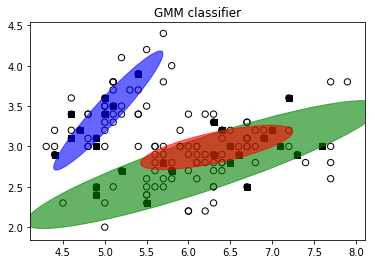

In [63]:
#visualization
plt.figure()
colors = "bgr"
for i, color in enumerate(colors) : 
    eigenvalues, eigenvectors = np.linalg.eigh(classifier._get_covars()[i][:2, :2])
    #normalize the first eigenvector
    norm_vec = eigenvectors[0] / np.linalg.norm(eigenvectors[0])
    #rotation angle
    angle = np.arctan2(norm_vec[1], norm_vec[0])
    angle = 180 * angle / np.pi
    
    scaling_factor = 8
    eigenvalues *= scaling_factor
    
    ellipse = patches.Ellipse(classifier.means_[i, :2], 
                             eigenvalues[0], eigenvalues[1], 180+angle, color=color)
    axis_handle = plt.subplot(1, 1, 1)
    ellipse.set_clip_box(axis_handle.bbox)
    ellipse.set_alpha(0.6)
    axis_handle.add_artist(ellipse)

colors = "bgr"
for i, color in enumerate(colors) : 
    cur_data = iris.data[iris.target == i]
    plt.scatter(cur_data[:, 0], cur_data[:, 1], marker="o", 
               facecolors="none", edgecolors="black", s=40, label=iris.target_names[i])
    
    test_data = X_test[Y_test == i]
    plt.scatter(test_data[:, 0], test_data[:, 1], marker="s", 
               facecolors="black", edgecolors="black", s=40, label=iris.target_names[i])
    
Y_train_pred = classifier.predict(X_train)
accuracy_training = np.mean(Y_train_pred.ravel() == Y_train.ravel()) * 100
print("Accuracy on training data =", accuracy_training)

Y_test_pred = classifer = classifier.predict(X_test)
accuracy_testing = np.mean(Y_test_pred.ravel() == Y_test.ravel()) * 100
print("Accuracy on testing data =", accuracy_testing)

plt.title("GMM classifier")
plt.xticks()
plt.yticks()

plt.show()